In [ ]:
# ==========================
# Upload File CSV
# ==========================
from google.colab import files

print("Silakan upload file CSV kamu...")
uploaded = files.upload()


Silakan upload file CSV kamu...


Saving daya.csv to daya.csv


In [ ]:
# ==========================
# Membaca Data CSV
# ==========================
import pandas as pd

# Ambil nama file yang diupload
nama_file = list(uploaded.keys())[0]

# Membaca file CSV
data = pd.read_csv(nama_file, sep=';')

# Menampilkan 5 data pertama
print("Data berhasil dibaca:")
display(data.head())


Data berhasil dibaca:


,hari,Waktu,Reflektor Aluminium Foil,Tanpa Reflektor,Reflektor Cermin Datar
0,H1,08:00:00,1.04,2.11,0.98
1,H1,08:01:00,1.05,2.11,0.99
2,H1,08:02:00,1.06,2.12,1.00
3,H1,08:03:00,1.07,2.12,1.01
4,H1,08:04:00,1.09,2.12,1.02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

gap_size = 150  # jumlah baris kosong antar hari
gap_template = {
    'hari': [np.nan] * gap_size,
    'Waktu': [np.nan] * gap_size,
    'Reflektor Aluminium Foil': [np.nan] * gap_size,
    'Tanpa Reflektor': [np.nan] * gap_size,
    'Reflektor Cermin Datar': [np.nan] * gap_size,
    'Lingkungan': [np.nan] * gap_size,
    'hari_num': [np.nan] * gap_size
}

# Buat kolom 'hari_num' dari kolom 'hari' (H1 -> 1)
# Handle potential NaN values before converting to int
data['hari_num'] = data['hari'].str.extract('H(\d+)').fillna(0).astype(int)

# Urutkan berdasarkan hari dan waktu
data = data.sort_values(['hari_num', 'Waktu']).reset_index(drop=True)

new_data = pd.DataFrame(columns=data.columns)

# Gabungkan data dan gap
unique_days = data['hari_num'].unique()

for day in unique_days:
    day_data = data[data['hari_num'] == day]

    # Tambahkan data hari ini
    new_data = pd.concat([new_data, day_data], ignore_index=True)

    # Tambahkan gap kosong
    gap_df = pd.DataFrame(gap_template)
    new_data = pd.concat([new_data, gap_df], ignore_index=True)

# Hasil akhir sudah dalam satu DataFrame
data = new_data.reset_index(drop=True)


# Ubah ke tipe datetime (kalau masih string)
# Use errors='coerce' to handle potential parsing issues with NaN or invalid time formats
data['Waktu'] = pd.to_datetime(data['Waktu'], format='%H:%M:%S', errors='coerce').dt.time
# List jam target
jam_target = [f'{hour:02d}:00:00' for hour in range(8, 17,2)]  # 08:00:00 sampai 16:00:00

# Konversi ke tipe waktu
jam_target = [pd.to_datetime(j, format='%H:%M:%S').time() for j in jam_target]

<ipython-input-3-522552275>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_data = pd.concat([new_data, day_data], ignore_index=True)


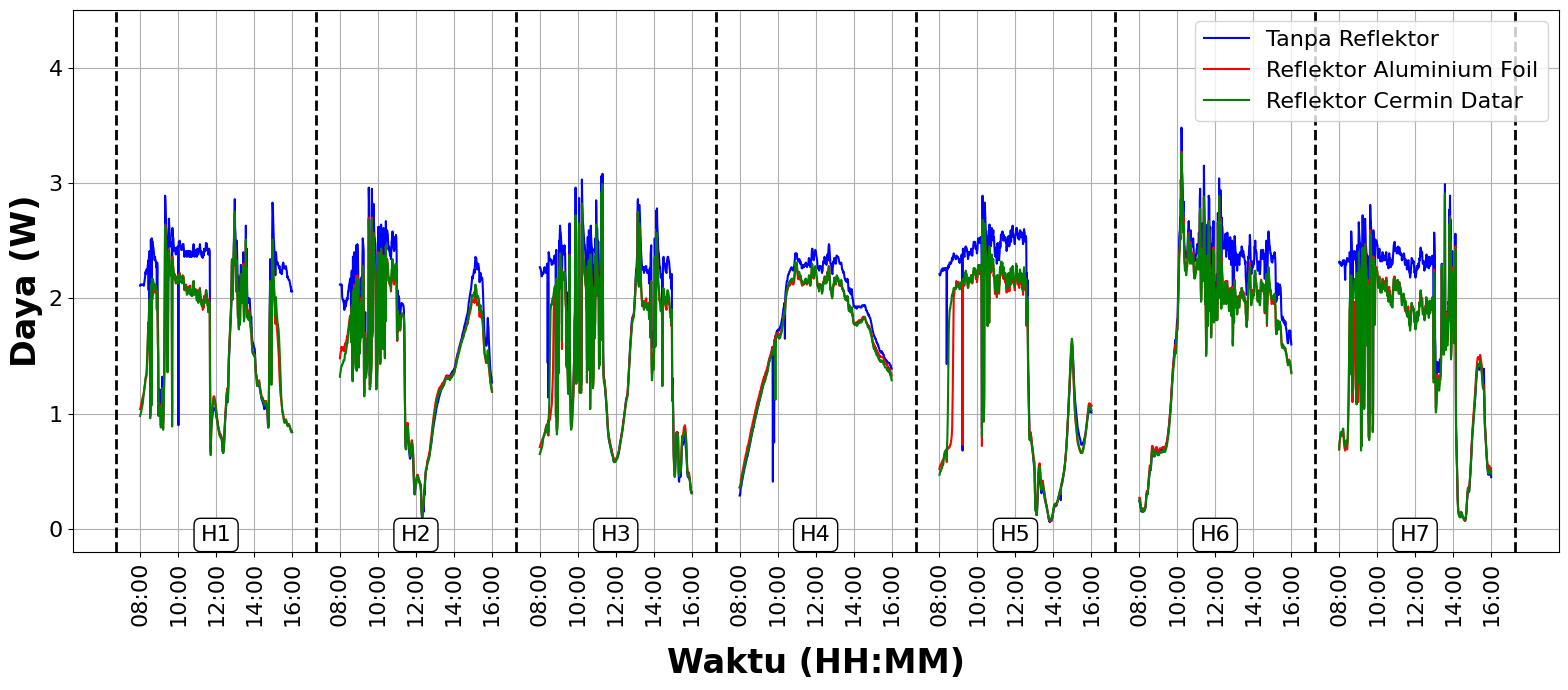

In [ ]:
# Ubah ke tipe datetime (kalau masih string)
# Use errors='coerce' to handle potential parsing issues with NaN or invalid time formats
data['Waktu'] = pd.to_datetime(data['Waktu'], format='%H:%M:%S', errors='coerce').dt.time
# List jam target
jam_target = [f'{hour:02d}:00:00' for hour in range(8, 17,2)]  # 08:00:00 sampai 16:00:00

# Konversi ke tipe waktu
jam_target = [pd.to_datetime(j, format='%H:%M:%S').time() for j in jam_target]

# --- ADDED CODE ---
# Explicitly convert temperature columns to numeric, coercing errors to NaN
temp_columns = ['Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar']
for col in temp_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
# --- END ADDED CODE ---

# plot
plt.figure(figsize=(16,7))
plt.plot(data.index, data['Tanpa Reflektor'], label='Tanpa Reflektor', color='blue')
plt.plot(data.index, data['Reflektor Aluminium Foil'], label='Reflektor Aluminium Foil', color='red')
plt.plot(data.index, data['Reflektor Cermin Datar'], label='Reflektor Cermin Datar', color='green')


# We want the line in the middle of the gap, so we find the last index of the previous day
# and the first index of the current gap. The line will be placed between them.
# We need to be careful with the very first gap.
line_positions = []
gap_indices = data[data['hari_num'].isna()].index

for idx in gap_indices:
    # Check if the previous row's 'hari_num' was not NaN
    if idx > 0 and not pd.isna(data.loc[idx - 1, 'hari_num']):
        # The line position is between the last real data point and the start of the gap
        line_position = idx - 0.5
        line_positions.append(line_position)

for pos in line_positions:
    plt.axvline(x=pos+gap_size/2, color='black', linestyle='--', linewidth=2)



# Ambil index untuk setiap waktu target
tick_positions = data[data['Waktu'].isin(jam_target)].index.tolist()

# Ambil label untuk xtick
tick_labels = data.loc[tick_positions, 'Waktu'].astype(str).str[:5]  # Format label jadi 'HH:MM'


plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=90, ha='center',fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Waktu (HH:MM)', fontsize=24, labelpad=15,fontweight='bold')
plt.ylabel('Daya (W)', fontsize=24,fontweight='bold')
plt.legend(fontsize=16)
plt.tight_layout()
plt.grid()
plt.ylim(bottom=-0.2, top=4.5)


# Add day labels below the time labels
unique_days_sorted = sorted(data['hari_num'].dropna().unique())
text_positions = []
labels = []

# Calculate the approximate center index for each day's data
for day_num in unique_days_sorted:
    if day_num > 0: # Ensure we only consider actual days (hari_num > 0)
        day_data_indices = data[data['hari_num'] == day_num].index
        if not day_data_indices.empty:
            # Calculate the middle index of this day's data range
            center_index = day_data_indices.min() + (day_data_indices.max() - day_data_indices.min()) / 2
            text_positions.append(center_index)
            labels.append(f'H{int(day_num)}')

# Add the text labels below the plot
ax = plt.gca() # Get the current axes
y_pos_offset = -0.05 # Adjust this value to move the labels up or down (negative moves down)

for i, pos in enumerate(text_positions):
    ax.text(pos, ax.get_ylim()[0] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * y_pos_offset,
            labels[i], ha='center', va='top', fontsize=16, clip_on=False,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()

Daya H-6
4.0


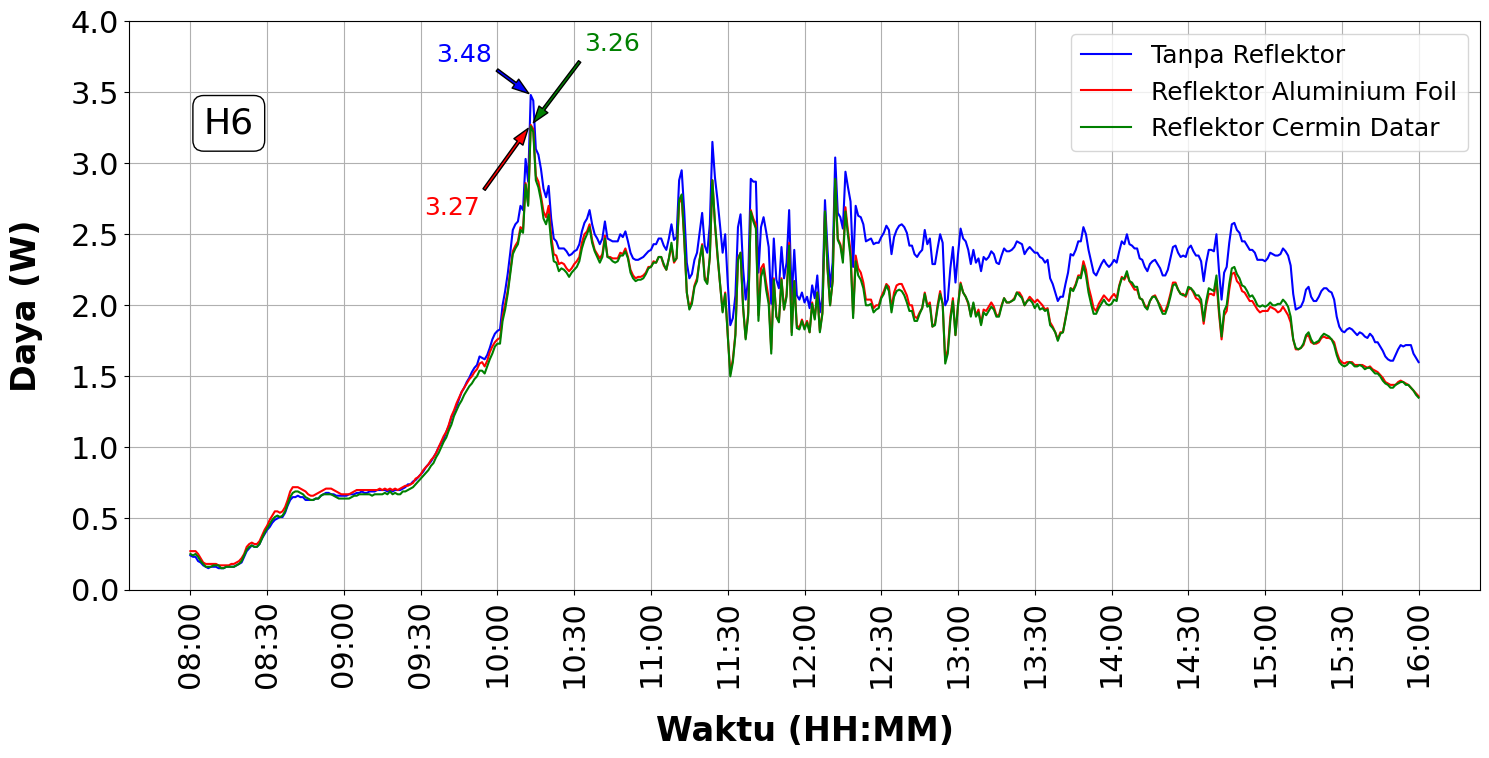

In [ ]:
# Filter data for H7 only
# Note: Based on the original code, 'hari_num' == 6 corresponds to 'H6',
# assuming 'hari_num' 1 corresponds to 'H1', 2 to 'H2', etc. up to 7 for 'H7'.
# So, filtering for == 6 gets the data for 'H7'.
data_h7 = data[data['hari_num'] == 6].copy().reset_index(drop=True)

# Create a list of target times every 30 minutes for H7
import datetime

start_time_str = '08:00:00'
end_time_str = '16:00:00'
time_interval_minutes = 30

start_dt = datetime.datetime.strptime(start_time_str, '%H:%M:%S').time()
end_dt = datetime.datetime.strptime(end_time_str, '%H:%M:%S').time()

# Generate all 30-minute time points within the range
all_30_min_times = []
current_time = datetime.datetime.combine(datetime.date.today(), start_dt)
end_datetime = datetime.datetime.combine(datetime.date.today(), end_dt)

while current_time <= end_datetime:
    all_30_min_times.append(current_time.time())
    current_time += datetime.timedelta(minutes=time_interval_minutes)

# Filter the H7 data to find rows that match these 30-minute intervals
tick_positions_h7_30min = data_h7[data_h7['Waktu'].isin(all_30_min_times)].index.tolist()

# Ambil label untuk xtick (gunakan data_h7) - format ke HH:MM
tick_labels_h7_30min = data_h7.loc[tick_positions_h7_30min, 'Waktu'].astype(str).str[:5]

# plot for H7
plt.figure(figsize=(15,8))
line_tanpa = plt.plot(data_h7.index, data_h7['Tanpa Reflektor'], label='Tanpa Reflektor', color='blue')
line_aluminium = plt.plot(data_h7.index, data_h7['Reflektor Aluminium Foil'], label='Reflektor Aluminium Foil', color='red')
line_cermin = plt.plot(data_h7.index, data_h7['Reflektor Cermin Datar'], label='Reflektor Cermin Datar', color='green')


# Find and annotate maximum values for each line with adjusted positions
lines_to_annotate = {
    'Tanpa Reflektor': {'color': 'blue', 'line': line_tanpa[0]},
    'Reflektor Aluminium Foil': {'color': 'red', 'line': line_aluminium[0]},
    'Reflektor Cermin Datar': {'color': 'green', 'line': line_cermin[0]},
    }

for column_name, plot_info in lines_to_annotate.items():
    # Find the maximum value and its index, ignoring NaN values
    max_temp = data_h7[column_name].max()
    max_index = data_h7[column_name].idxmax()

    # Get the x and y coordinates for the data point
    x_pos = max_index
    y_pos = max_temp

    # Determine text position and vertical alignment based on the column
    # Adjusted positions as requested
    fontweight='bold'
    if column_name == 'Reflektor Aluminium Foil':
        # Position slightly to the left and below for Aluminium Foil (original logic)
        text_xytext = (x_pos - 20, y_pos - 0.5)
        text_ha = 'right'
        text_va = 'top'
    elif column_name == 'Reflektor Cermin Datar':
        # Position 10 units to the right for Reflektor Cermin Datar
        text_xytext = (x_pos + 21, y_pos + 0.5) # Increased x-offset
        text_ha = 'left'
        text_va = 'bottom'
    elif column_name == 'Tanpa Reflektor':
        # Position 15 units to the left for Tanpa Reflektor
        text_xytext = (x_pos -15, y_pos + 0.2) # Decreased x-offset
        text_ha = 'right'
        text_va = 'bottom'
    else:
        # Default position (should not be reached with these column names)
        text_xytext = (x_pos + 10, y_pos + 0.5)
        text_ha = 'left'
        text_va = 'bottom'

    # Add text annotation for the maximum temperature
    plt.annotate(f'{max_temp:.2f}',  # Format temperature to one decimal place
                 xy=(x_pos, y_pos),  # The point being annotated
                 xytext=text_xytext, # Position the text based on adjusted values
                 fontsize=18,
                 color=plot_info['color'],
                 ha=text_ha,  # Set horizontal alignment based on position
                 va=text_va, # Set vertical alignment based on position
                 textcoords='data', # Coordinates are relative to the data
                 arrowprops=dict(facecolor=plot_info['color'], shrink=0.05, width=2, headwidth=8))


# Update xticks to use the new 30-minute positions and labels
plt.xticks(ticks=tick_positions_h7_30min, labels=tick_labels_h7_30min, rotation=90, ha='center',fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Waktu (HH:MM)', fontsize=24, labelpad=20,fontweight='bold')
plt.ylabel('Daya (W)', fontsize=24, labelpad=20,fontweight='bold')
plt.legend(fontsize=18)
plt.tight_layout()
plt.grid()
plt.ylim(bottom=0, top=4)

# Add day label for H7
ax = plt.gca() # Get the current axes
y_pos_offset = -1 # Adjust this value to move the labels up or down (negative moves down)

# Calculate the center index for H7 data
if not data_h7.index.empty:
    # The text position (15, 3.6) is fixed in data coordinates in the original code
    # Let's keep that as it was used in the original snippet
    ax.text(15, 3.4,
            'H6', ha='center', va='top', fontsize=26, clip_on=False,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Print statement from the original snippet
print("Daya H-6")
print(ax.get_ylim()[0] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * y_pos_offset) # This seems to calculate a position based on y-limits and offset

# Display the plot
plt.show()

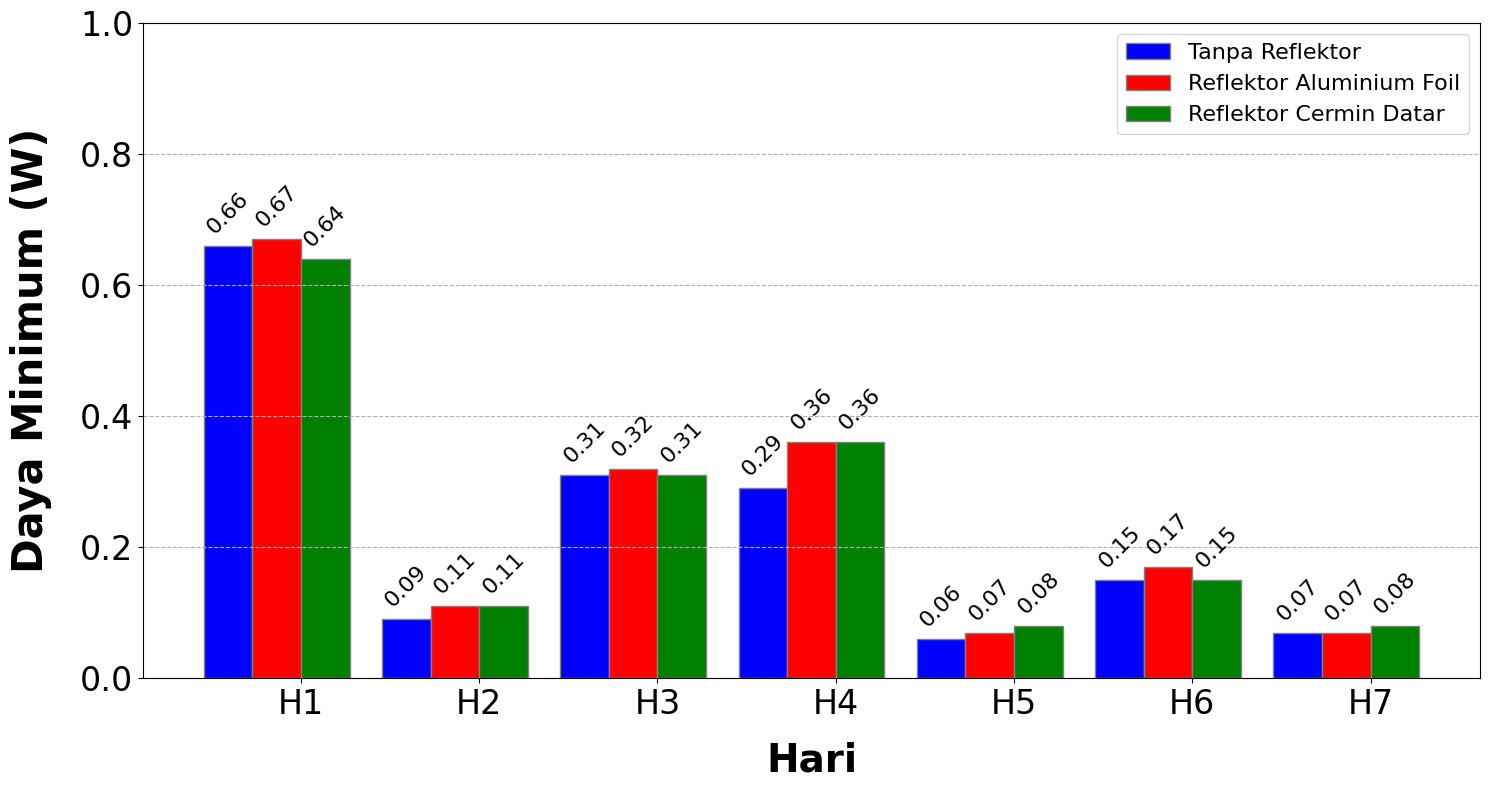

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Diasumsikan DataFrame 'data' sudah ada dan terstruktur seperti sebelumnya
# dengan kolom 'hari_num', 'Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar'
# (Bagian ini bergantung pada kode sebelumnya yang memuat dan memproses data)

# --- Asumsi data sudah dimuat dan diproses sebelumnya ---
# Jika Anda menjalankan ini secara terpisah, Anda perlu memastikan DataFrame 'data' sudah ada
# dengan struktur kolom yang disebutkan di atas.
# Contoh:
# data = pd.read_csv('nama_file_anda.csv', sep=';')
# data['hari_num'] = data['hari'].str.extract('H(\d+)').fillna(0).astype(int)
# data['Reflektor Aluminium Foil'] = pd.to_numeric(data['Reflektor Aluminium Foil'], errors='coerce')
# data['Tanpa Reflektor'] = pd.to_numeric(data['Tanpa Reflektor'], errors='coerce')
# data['Reflektor Cermin Datar'] = pd.to_numeric(data['Reflektor Cermin Datar'], errors='coerce')
# --- Akhir asumsi ---


# Hitung nilai minimum per hari untuk setiap jenis reflektor
min_power_per_day = data.groupby('hari_num')[['Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar']].min().dropna()

# Filter hanya untuk hari 1 sampai 7 (sesuaikan range jika perlu)
# Asumsi hari_num 1-7 sudah ada dalam data setelah pengelompokan dan dropna
min_power_per_day = min_power_per_day[min_power_per_day.index.isin(range(1, 8))]


# Reset index untuk mengubah 'hari_num' dari index menjadi kolom biasa
min_power_per_day = min_power_per_day.reset_index()

# Periksa apakah min_power_per_day tidak kosong setelah filtering
if min_power_per_day.empty:
    print("Tidak ada data minimum daya untuk hari 1-7.")
else:
    # Buat figure dan axes untuk plot
    plt.figure(figsize=(15, 8))

    # Atur lebar batang dan jarak antar kelompok batang (untuk tiap hari)
    bar_width = 0.6 # Lebar batang
    gap_between_days = 0.4 # Jarak antar kelompok batang per hari

    # Hitung posisi x-axis untuk setiap kelompok batang per hari
    # Total lebar untuk satu hari adalah 3 * bar_width + gap_between_days
    group_width = 3 * bar_width + gap_between_days
    r1 = np.arange(len(min_power_per_day)) * group_width
    r2 = r1 + bar_width
    r3 = r2 + bar_width


    # Buat batang untuk setiap jenis reflektor
    bars1 = plt.bar(r1, min_power_per_day['Tanpa Reflektor'], color='blue', width=bar_width, edgecolor='grey', label='Tanpa Reflektor')
    bars2 = plt.bar(r2, min_power_per_day['Reflektor Aluminium Foil'], color='red', width=bar_width, edgecolor='grey', label='Reflektor Aluminium Foil')
    bars3 = plt.bar(r3, min_power_per_day['Reflektor Cermin Datar'], color='green', width=bar_width, edgecolor='grey', label='Reflektor Cermin Datar')

    # Fungsi untuk menambahkan label nilai di atas setiap batang dengan ROTASI dan OFFSET VERTICAL
    # Menggunakan va='bottom' agar bagian bawah teks sejajar dengan yval sebelum rotasi
    def add_value_labels_rotated(bars, rotation=45, y_offset=0.05): # Tambahkan parameter y_offset
        for bar in bars:
            yval = bar.get_height()
            # Titik referensi untuk teks adalah tengah atas batang (bar.get_x() + bar.get_width()/2, yval)
            # Tambahkan y_offset ke posisi vertikal
            plt.text(bar.get_x() + bar.get_width()/2, yval + y_offset, f'{yval:.2f}', # Tambahkan y_offset di sini
                     ha='center',      # Horizontal alignment: teks terpusat di atas titik x
                     va='center',      # Vertical alignment: bagian bawah teks di titik y (sebelum rotasi)
                     fontsize=16,
                     rotation=rotation,# Rotasi teks
                     rotation_mode='anchor') # Rotasi di sekitar titik penempatan teks

    # Tambahkan label nilai untuk setiap kelompok batang dengan rotasi 45 derajat
    # Sesuaikan nilai y_offset sesuai kebutuhan untuk menaikkan label
    add_value_labels_rotated(bars1, rotation=45, y_offset=0.05) # Contoh offset 0.05
    add_value_labels_rotated(bars2, rotation=45, y_offset=0.05) # Gunakan offset yang sama
    add_value_labels_rotated(bars3, rotation=45, y_offset=0.05) # Gunakan offset yang sama

    # Atur label untuk sumbu x dan y
    plt.xlabel('Hari', fontsize=28, labelpad=15,fontweight='bold')
    plt.ylabel('Daya Minimum (W)', fontsize=30, labelpad=20,fontweight='bold')

    # Atur limit sumbu y - SESUAIKAN DENGAN RENTANG DATA DAYA ANDA
    # Anda mungkin perlu menyesuaikan nilai top ini agar semua label terlihat
    # Tinggikan sedikit batas atas agar label yang diputar tidak terpotong
    plt.ylim(bottom=0, top=1) # Nilai top mungkin perlu disesuaikan lebih lanjut

    # Atur posisi dan label ticks (penanda) di sumbu x
    # Ticks ditempatkan di tengah kelompok batang per hari
    tick_positions = r1 + bar_width * 1.5
    tick_labels = [f'H{int(h)}' for h in min_power_per_day['hari_num']]
    plt.xticks(ticks=tick_positions, labels=tick_labels, fontsize=24)

    # Atur ukuran font untuk ticks di sumbu y
    plt.yticks(fontsize=24)

    # Tambahkan legenda untuk mengidentifikasi batang
    plt.legend(fontsize=16)

    # Tambahkan grid horizontal untuk memudahkan membaca nilai
    plt.grid(axis='y', linestyle='--')

    # Sesuaikan layout agar tidak ada elemen plot yang terpotong
    plt.tight_layout()

    # Tampilkan plot
    plt.show()

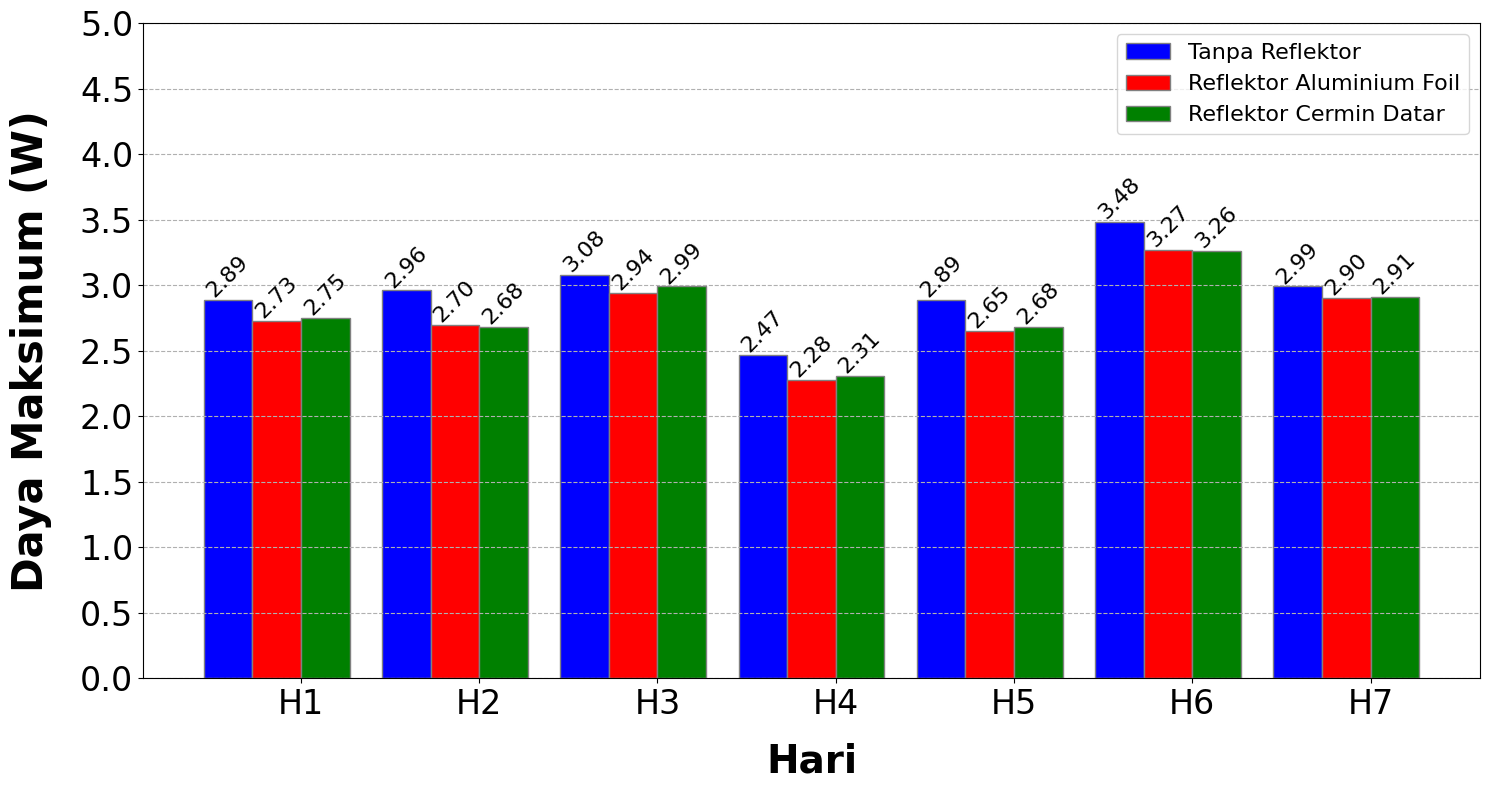

suhu max


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Hitung nilai maksimum per hari untuk setiap jenis reflektor (tetap menggunakan max)
max_power_per_day = data.groupby('hari_num')[['Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar']].max().dropna()
max_power_per_day = max_power_per_day[max_power_per_day.index.isin(range(1, 8))]
max_power_per_day = max_power_per_day.reset_index()

# --- Bagian Plotting yang Disesuaikan ---

# Buat figure dan axes untuk plot, sesuaikan ukuran seperti plot min daya
plt.figure(figsize=(15, 8))

# Atur lebar batang dan jarak antar kelompok batang (untuk tiap hari)
bar_width = 0.6
gap_between_days = 0.4

# Hitung posisi x-axis untuk setiap kelompok batang per hari
group_width = 3 * bar_width + gap_between_days
r1 = np.arange(len(max_power_per_day)) * group_width
r2 = r1 + bar_width
r3 = r2 + bar_width

# Buat batang untuk setiap jenis reflektor
bars1 = plt.bar(r1, max_power_per_day['Tanpa Reflektor'], color='blue', width=bar_width, edgecolor='grey', label='Tanpa Reflektor')
bars2 = plt.bar(r2, max_power_per_day['Reflektor Aluminium Foil'], color='red', width=bar_width, edgecolor='grey', label='Reflektor Aluminium Foil')
bars3 = plt.bar(r3, max_power_per_day['Reflektor Cermin Datar'], color='green', width=bar_width, edgecolor='grey', label='Reflektor Cermin Datar')

# Fungsi untuk menambahkan label nilai di ATAS TENGAH setiap batang dengan ROTASI
def add_value_labels_top_center_rotated(bars, rotation=30, y_offset=0.02):
    for bar in bars:
        yval = bar.get_height()
        # Titik referensi horizontal adalah tengah batang: bar.get_x() + bar.get_width()/2
        # Titik referensi vertikal adalah di atas batang dengan offset: yval + y_offset
        plt.text(bar.get_x() + bar.get_width()/2, yval + y_offset, f'{yval:.2f}',
                 ha='center',      # Horizontal alignment: teks terpusat di atas titik x
                 va='center',      # Vertical alignment: bagian bawah teks di titik y (sebelum rotasi)
                 fontsize=16,
                 rotation=rotation,# Rotasi teks
                 rotation_mode='anchor') # Rotasi di sekitar titik penempatan teks

# Tambahkan label nilai untuk setiap kelompok batang dengan rotasi 30 derajat di atas tengah batang
add_value_labels_top_center_rotated(bars1, rotation=45, y_offset=0.18)
add_value_labels_top_center_rotated(bars2, rotation=45, y_offset=0.18)
add_value_labels_top_center_rotated(bars3, rotation=45, y_offset=0.18)

# Atur label untuk sumbu x dan y
plt.xlabel('Hari', fontsize=28, labelpad=15,fontweight='bold')
plt.ylabel('Daya Maksimum (W)', fontsize=30, labelpad=20,fontweight='bold')

# Atur limit sumbu y - SESUAIKAN DENGAN RENTANG DATA DAYA MAKSIMUM ANDA
# Tinggikan sedikit batas atas agar label yang diputar tidak terpotong
plt.ylim(bottom=0, top=5) # Sesuaikan ini berdasarkan nilai maksimum Anda

# Atur posisi dan label ticks (penanda) di sumbu x
tick_positions = r1 + bar_width * 1.5
tick_labels = [f'H{int(h)}' for h in max_power_per_day['hari_num']]
plt.xticks(ticks=tick_positions, labels=tick_labels, fontsize=24)

# Atur ukuran font untuk ticks di sumbu y
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.yticks(fontsize=24)

# Tambahkan legenda untuk mengidentifikasi batang
plt.legend(fontsize=16)

# Tambahkan grid horizontal untuk memudahkan membaca nilai
plt.grid(axis='y', linestyle='--')

# Sesuaikan layout agar tidak ada elemen plot yang terpotong
plt.tight_layout()

# Tampilkan plot
plt.show()

print('suhu max')

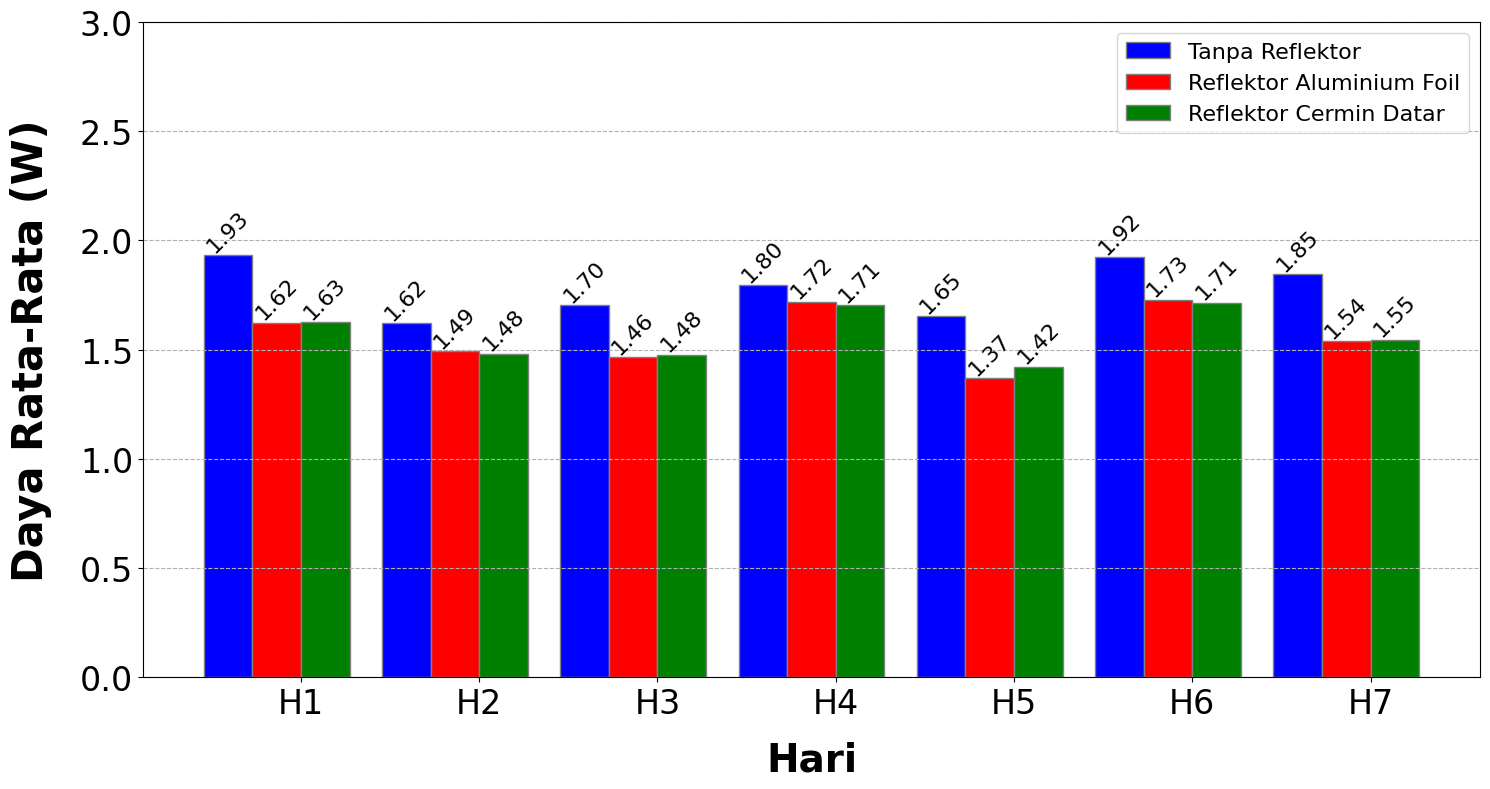

Daya rata-rata


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Impor ticker untuk mengatur interval y-axis
import pandas as pd # Pastikan pandas diimpor

# Diasumsikan DataFrame 'data' sudah ada dan terstruktur seperti sebelumnya
# dengan kolom 'hari_num', 'Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar'

# Hitung nilai rata-rata per hari untuk setiap jenis reflektor
# Mengubah dari min() menjadi mean()
avg_power_per_day = data.groupby('hari_num')[['Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar']].mean().dropna()

# Filter hanya untuk hari 1 sampai 7 (sesuaikan range jika perlu)
avg_power_per_day = avg_power_per_day[avg_power_per_day.index.isin(range(1, 8))]

# Reset index untuk mengubah 'hari_num' dari index menjadi kolom biasa
avg_power_per_day = avg_power_per_day.reset_index()

# Periksa apakah avg_power_per_day tidak kosong setelah filtering
if avg_power_per_day.empty:
    print("Tidak ada data rata-rata daya untuk hari 1-7.")
else:
    # Buat figure dan axes untuk plot, sesuaikan ukuran seperti plot max daya
    plt.figure(figsize=(15, 8)) # Ukuran figure sama dengan plot max daya

    # Atur lebar batang dan jarak antar kelompok batang (untuk tiap hari)
    # Menggunakan nilai yang sama dengan plot max daya
    bar_width = 0.6
    gap_between_days = 0.4

    # Hitung posisi x-axis untuk setiap kelompok batang per hari
    group_width = 3 * bar_width + gap_between_days
    r1 = np.arange(len(avg_power_per_day)) * group_width
    r2 = r1 + bar_width
    r3 = r2 + bar_width

    # Buat batang untuk setiap jenis reflektor
    # Sesuaikan warna jika perlu agar konsisten dengan plot max daya (misalnya, biru untuk Tanpa Reflektor)
    bars1 = plt.bar(r1, avg_power_per_day['Tanpa Reflektor'], color='blue', width=bar_width, edgecolor='grey', label='Tanpa Reflektor')
    bars2 = plt.bar(r2, avg_power_per_day['Reflektor Aluminium Foil'], color='red', width=bar_width, edgecolor='grey', label='Reflektor Aluminium Foil')
    bars3 = plt.bar(r3, avg_power_per_day['Reflektor Cermin Datar'], color='green', width=bar_width, edgecolor='grey', label='Reflektor Cermin Datar')

    # Fungsi untuk menambahkan label nilai di ATAS TENGAH setiap batang dengan ROTASI
    # Menggunakan fungsi yang sama dengan plot max daya
    def add_value_labels_top_center_rotated(bars, rotation=30, y_offset=0.02):
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + y_offset, f'{yval:.2f}',
                     ha='center',
                     va='center',
                     fontsize=16,
                     rotation=rotation,
                     rotation_mode='anchor')

    # Tambahkan label nilai untuk setiap kelompok batang dengan rotasi 30 derajat di atas tengah batang
    # Sesuaikan y_offset agar label terlihat jelas
    add_value_labels_top_center_rotated(bars1, rotation=45, y_offset=0.11) # Gunakan offset yang sama
    add_value_labels_top_center_rotated(bars2, rotation=45, y_offset=0.11) # Gunakan offset yang sama
    add_value_labels_top_center_rotated(bars3, rotation=45, y_offset=0.11) # Gunakan offset yang sama

    # Atur label untuk sumbu x dan y
    plt.xlabel('Hari', fontsize=28, labelpad=15,fontweight='bold') # Fontsize sama
    plt.ylabel('Daya Rata-Rata (W)', fontsize=30, labelpad=20,fontweight='bold') # Fontsize dan labelpad sama

    # Atur limit sumbu y - SESUAIKAN DENGAN RENTANG DATA DAYA RERATA ANDA
    # Tinggikan sedikit batas atas agar label yang diputar tidak terpotong
    # Sesuaikan rentang y-axis agar cocok dengan nilai rata-rata (mungkin berbeda dengan max daya)
    plt.ylim(bottom=0, top=3) # Anda mungkin perlu menyesuaikan nilai top ini

    # Atur interval major tick di sumbu y seperti pada plot max daya
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))


    # Atur posisi dan label ticks (penanda) di sumbu x
    # Ticks ditempatkan di tengah kelompok batang per hari, seperti pada plot max daya
    tick_positions = r1 + bar_width * 1.5
    tick_labels = [f'H{int(h)}' for h in avg_power_per_day['hari_num']]
    plt.xticks(ticks=tick_positions, labels=tick_labels, fontsize=24) # Fontsize sama

    # Atur ukuran font untuk ticks di sumbu y
    plt.yticks(fontsize=24) # Fontsize sama

    # Tambahkan legenda untuk mengidentifikasi batang
    plt.legend(fontsize=16) # Fontsize sama

    # Tambahkan grid horizontal untuk memudahkan membaca nilai
    plt.grid(axis='y', linestyle='--') # Style grid sama

    # Sesuaikan layout agar tidak ada elemen plot yang terpotong
    plt.tight_layout() # Menggunakan tight_layout

    # Tampilkan plot
    plt.show()

print('Daya rata-rata') # Mengubah print statement

<ipython-input-9-2968129615>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(boxplot_data, patch_artist=True, labels=labels, vert=True, showfliers=False) # showfliers=False menyembunyikan outlier


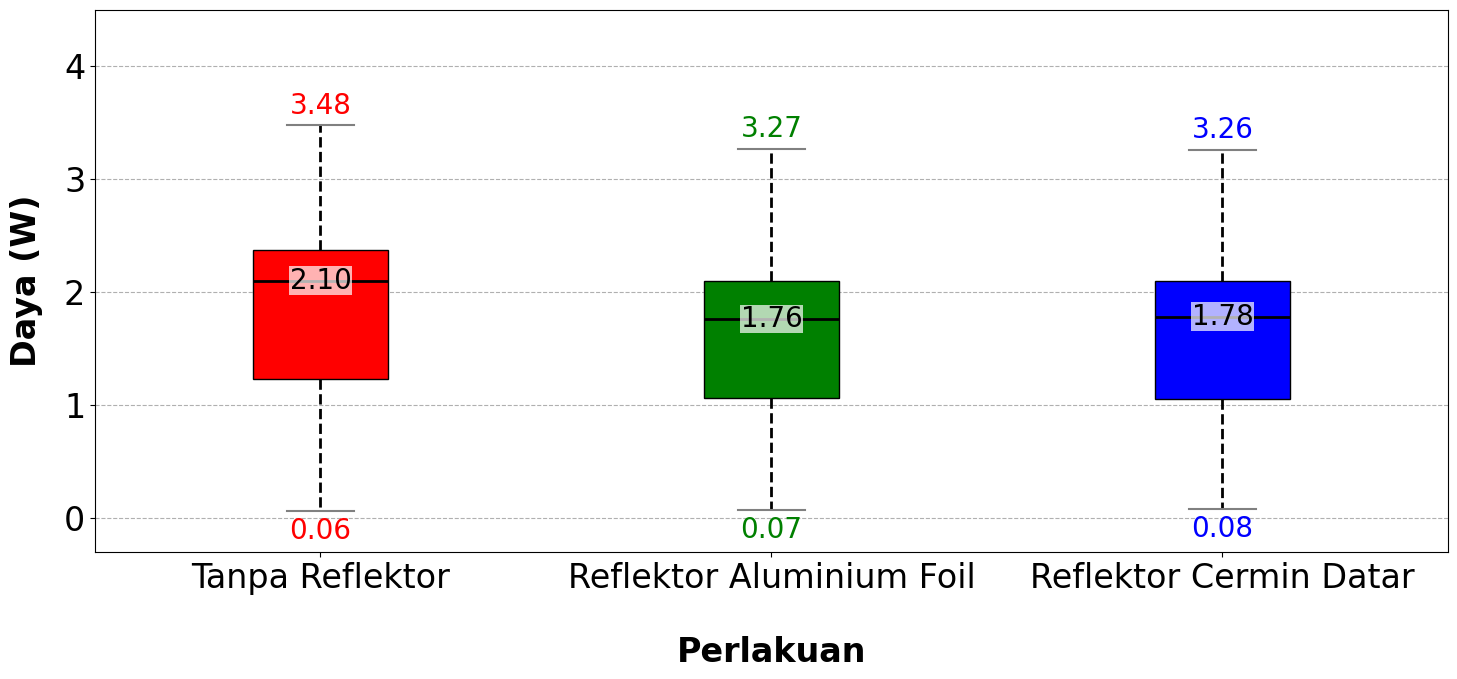

In [ ]:
# Buat data untuk boxplot
# Ambil kolom suhu yang relevan, hilangkan nilai NaN
boxplot_data = [
    data['Tanpa Reflektor'].dropna(),
    data['Reflektor Aluminium Foil'].dropna(),
    data['Reflektor Cermin Datar'].dropna()
]

# Label untuk boxplot
labels = ['Tanpa Reflektor', 'Reflektor Aluminium Foil', 'Reflektor Cermin Datar']

plt.figure(figsize=(15, 7))

# Membuat boxplot dengan showmeans=True untuk menampilkan median
# Patch_artist=True memungkinkan pewarnaan box
# vert=True membuat boxplot vertikal (sesuai permintaan)
box = plt.boxplot(boxplot_data, patch_artist=True, labels=labels, vert=True, showfliers=False) # showfliers=False menyembunyikan outlier

# Pewarnaan box (sesuaikan dengan warna di plot garis sebelumnya)
colors = ['red', 'green', 'blue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Mengatur style garis median
for median in box['medians']:
    median.set(color='black', linewidth=2) # Atur warna dan ketebalan garis median

# Mengatur style garis whiskers (garis dari box ke min/max)
for whisker in box['whiskers']:
    whisker.set(color='black', linestyle='--',linewidth=2) # Atur warna dan style garis whiskers

# Mengatur style caps (ujung garis whiskers)
for cap in box['caps']:
    cap.set(color='gray', linewidth=1.5) # Atur warna dan ketebalan caps

# Menampilkan nilai min, max, dan median di atas/bawah/tengah
for i, dataset in enumerate(boxplot_data):
    # Hitung nilai min, max, dan median (gunakan numpy untuk robustness terhadap tipe data pandas Series)
    min_val = np.min(dataset)
    max_val = np.max(dataset)
    median_val = np.median(dataset)

    # Posisi horizontal (x) untuk setiap boxplot
    x_pos = i + 1

    # Menampilkan nilai maksimum di atas garis maksimum (caps)
    # Mengatur posisi y sedikit di atas cap
    plt.text(x_pos, max_val+0.05, f'{max_val:.2f}',
             horizontalalignment='center',
             verticalalignment='bottom', # Teks di bawah posisi y
             fontsize=20,
             color=colors[i])

    # Menampilkan nilai minimum di bawah garis minimum (caps)
    # Mengatur posisi y sedikit di bawah cap
    plt.text(x_pos, min_val-0.05, f'{min_val:.2f}',
             horizontalalignment='center',
             verticalalignment='top', # Teks di atas posisi y
             fontsize=20,
             color=colors[i])

    # Menampilkan nilai median di tengah garis median
    # Mengatur posisi y di tengah garis median
    # Kita bisa menambahkan offset kecil jika perlu agar tidak menutupi garis
    plt.text(x_pos, median_val, f'{median_val:.2f}',
             horizontalalignment='center',
             verticalalignment='center', # Teks di tengah posisi y
             fontsize=20,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.2)) # Background putih agar teks terlihat jelas

# Mengatur label sumbu
plt.ylabel('Daya (W)', fontsize=24,fontweight='bold',labelpad=15)
plt.xlabel('Perlakuan', fontsize=24,labelpad=30,fontweight='bold')
#plt.title('Boxplot Suhu Berdasarkan Jenis Reflektor', fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Menyesuaikan layout agar tidak ada yang terpotong
plt.ylim(bottom=-0.3, top=4.5)
plt.show()


Hasil Uji Normalitas Shapiro-Wilk
Reflektor Aluminium Foil:
  Statistik Uji: 0.9361
  P-value: 0.0000
  Kesimpulan: Data tampaknya tidak terdistribusi normal (menolak H0).

Tanpa Reflektor:
  Statistik Uji: 0.8925
  P-value: 0.0000
  Kesimpulan: Data tampaknya tidak terdistribusi normal (menolak H0).

Reflektor Cermin Datar:
  Statistik Uji: 0.9317
  P-value: 0.0000
  Kesimpulan: Data tampaknya tidak terdistribusi normal (menolak H0).

Tabel Hasil Uji Normalitas
               Perlakuan  Statistik Shapiro-Wilk  P-value Kesimpulan (alpha=0.05)
Reflektor Aluminium Foil                  0.9361   0.0000            Tidak Normal
         Tanpa Reflektor                  0.8925   0.0000            Tidak Normal
  Reflektor Cermin Datar                  0.9317   0.0000            Tidak Normal

QQ Plots Normalitas


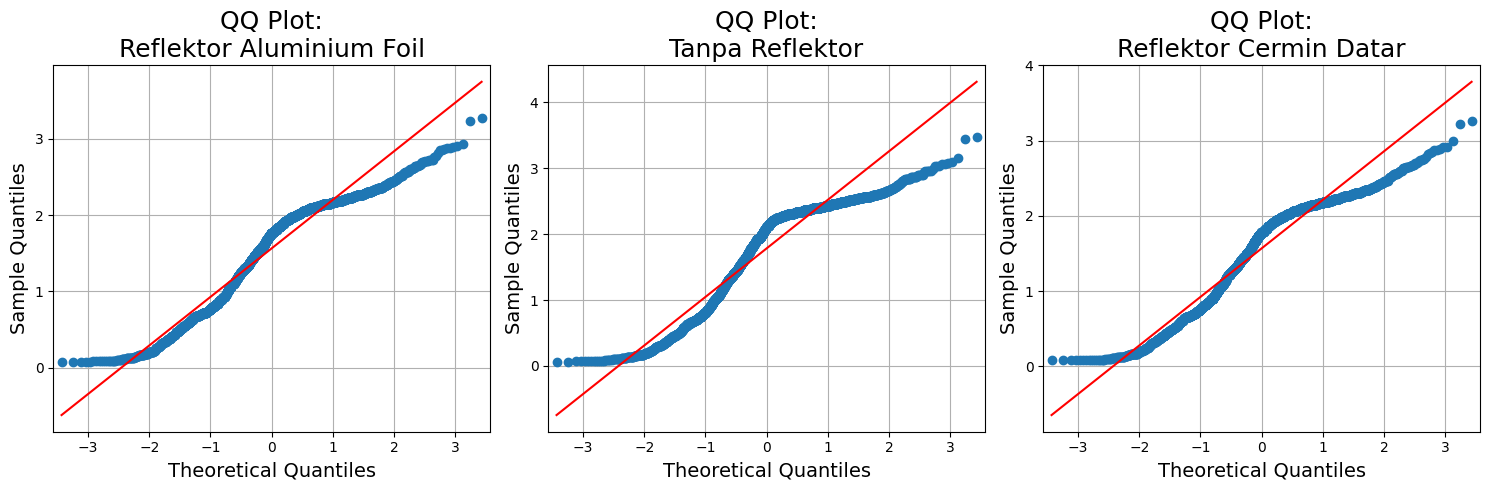


Penjelasan Statistik
Untuk mengecek normalitas data, saya menggunakan:
1.  **Uji Shapiro-Wilk:**
    -   Ini adalah uji statistik parametrik yang digunakan untuk menguji apakah sampel data berasal dari populasi yang berdistribusi normal.
    -   Cocok untuk ukuran sampel yang relatif kecil (biasanya < 5000).
    -   Hasil utama adalah Statistik Uji dan P-value.
    -   **Statistik Uji:** Nilai yang dihitung dari data sampel untuk mengukur seberapa jauh data menyimpang dari distribusi normal.
    -   **P-value:** Probabilitas mengamati statistik uji yang se-ekstrem atau lebih ekstrem dari yang diamati, dengan asumsi hipotesis nol (data normal) adalah benar.
    -   **Interpretasi:**
        -   Jika P-value > tingkat signifikansi (umumnya 0.05), kita **tidak menolak** hipotesis nol. Artinya, tidak ada cukup bukti untuk menyatakan data tidak normal. Data **dianggap** normal.
        -   Jika P-value <= tingkat signifikansi (umumnya 0.05), kita **menolak** hipotesis nol. Artinya, ada buk

In [ ]:
# prompt: saya mau melakukan pengecekan apakah data suhu dari semua perlakuan reflektor ini tersebar secara normal atau tidak. berikan hasilnya dan berikan qq plot, kalau bisa tabelnya dan pakai statistik apa biar nanti saya bisa belajar

!pip install scipy statsmodels

import scipy.stats as stats
import statsmodels.api as sm

# Ambil data suhu untuk setiap perlakuan, hilangkan NaN
suhu_aluminium = data['Reflektor Aluminium Foil'].dropna()
suhu_tanpa = data['Tanpa Reflektor'].dropna()
suhu_cermin = data['Reflektor Cermin Datar'].dropna()

# ==========================
# Uji Normalitas Shapiro-Wilk
# ==========================
# Statistik yang umum digunakan untuk menguji normalitas pada sampel kecil hingga sedang.
# Hipotesis Nol (H0): Data terdistribusi secara normal.
# Hipotesis Alternatif (H1): Data tidak terdistribusi secara normal.
# Jika p-value > alpha (misal alpha = 0.05), kita tidak menolak H0, yang berarti data diasumsikan normal.
# Jika p-value <= alpha, kita menolak H0, yang berarti data diasumsikan tidak normal.

print("\n============================")
print("Hasil Uji Normalitas Shapiro-Wilk")
print("============================")

# Uji untuk Reflektor Aluminium Foil
stat_al, p_value_al = stats.shapiro(suhu_aluminium)
print(f"Reflektor Aluminium Foil:")
print(f"  Statistik Uji: {stat_al:.4f}")
print(f"  P-value: {p_value_al:.4f}")
if p_value_al > 0.05:
    print("  Kesimpulan: Data tampaknya terdistribusi normal (tidak menolak H0).")
else:
    print("  Kesimpulan: Data tampaknya tidak terdistribusi normal (menolak H0).")

# Uji untuk Tanpa Reflektor
stat_tanpa, p_value_tanpa = stats.shapiro(suhu_tanpa)
print(f"\nTanpa Reflektor:")
print(f"  Statistik Uji: {stat_tanpa:.4f}")
print(f"  P-value: {p_value_tanpa:.4f}")
if p_value_tanpa > 0.05:
    print("  Kesimpulan: Data tampaknya terdistribusi normal (tidak menolak H0).")
else:
    print("  Kesimpulan: Data tampaknya tidak terdistribusi normal (menolak H0).")

# Uji untuk Reflektor Cermin Datar
stat_cermin, p_value_cermin = stats.shapiro(suhu_cermin)
print(f"\nReflektor Cermin Datar:")
print(f"  Statistik Uji: {stat_cermin:.4f}")
print(f"  P-value: {p_value_cermin:.4f}")
if p_value_cermin > 0.05:
    print("  Kesimpulan: Data tampaknya terdistribusi normal (tidak menolak H0).")
else:
    print("  Kesimpulan: Data tampaknya tidak terdistribusi normal (menolak H0).")

# ==========================
# Tabel Hasil Uji Normalitas
# ==========================
print("\n============================")
print("Tabel Hasil Uji Normalitas")
print("============================")

normalitas_results = pd.DataFrame({
    'Perlakuan': ['Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar'],
    'Statistik Shapiro-Wilk': [stat_al, stat_tanpa, stat_cermin],
    'P-value': [p_value_al, p_value_tanpa, p_value_cermin],
    'Kesimpulan (alpha=0.05)': ['Normal' if p_value_al > 0.05 else 'Tidak Normal',
                                'Normal' if p_value_tanpa > 0.05 else 'Tidak Normal',
                                'Normal' if p_value_cermin > 0.05 else 'Tidak Normal']
})

print(normalitas_results.to_string(index=False, float_format='%.4f'))

# ==========================
# QQ Plot
# ==========================
# QQ Plot (Quantile-Quantile Plot) adalah metode grafis untuk membandingkan distribusi sampel
# dengan distribusi teoritis (dalam hal ini, distribusi normal).
# Jika titik-titik pada plot mendekati garis lurus diagonal, itu menunjukkan bahwa sampel
# berasal dari distribusi yang sama dengan distribusi teoritis.

print("\n============================")
print("QQ Plots Normalitas")
print("============================")

plt.figure(figsize=(15, 5))

# QQ Plot untuk Reflektor Aluminium Foil
plt.subplot(1, 3, 1)
sm.qqplot(suhu_aluminium, line='s', ax=plt.gca()) # line='s' adds the standard normal line
plt.title('QQ Plot:\nReflektor Aluminium Foil', fontsize=18)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.grid(True)


# QQ Plot untuk Tanpa Reflektor
plt.subplot(1, 3, 2)
sm.qqplot(suhu_tanpa, line='s', ax=plt.gca())
plt.title('QQ Plot:\nTanpa Reflektor', fontsize=18)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.grid(True)

# QQ Plot untuk Reflektor Cermin Datar
plt.subplot(1, 3, 3)
sm.qqplot(suhu_cermin, line='s', ax=plt.gca())
plt.title('QQ Plot:\nReflektor Cermin Datar', fontsize=18)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.grid(True)

plt.tight_layout() # Menyesuaikan layout antar subplot
plt.show()

# ==========================
# Penjelasan Statistik
# ==========================
print("\n============================")
print("Penjelasan Statistik")
print("============================")
print("Untuk mengecek normalitas data, saya menggunakan:")
print("1.  **Uji Shapiro-Wilk:**")
print("    -   Ini adalah uji statistik parametrik yang digunakan untuk menguji apakah sampel data berasal dari populasi yang berdistribusi normal.")
print("    -   Cocok untuk ukuran sampel yang relatif kecil (biasanya < 5000).")
print("    -   Hasil utama adalah Statistik Uji dan P-value.")
print("    -   **Statistik Uji:** Nilai yang dihitung dari data sampel untuk mengukur seberapa jauh data menyimpang dari distribusi normal.")
print("    -   **P-value:** Probabilitas mengamati statistik uji yang se-ekstrem atau lebih ekstrem dari yang diamati, dengan asumsi hipotesis nol (data normal) adalah benar.")
print("    -   **Interpretasi:**")
print("        -   Jika P-value > tingkat signifikansi (umumnya 0.05), kita **tidak menolak** hipotesis nol. Artinya, tidak ada cukup bukti untuk menyatakan data tidak normal. Data **dianggap** normal.")
print("        -   Jika P-value <= tingkat signifikansi (umumnya 0.05), kita **menolak** hipotesis nol. Artinya, ada bukti bahwa data **tidak** terdistribusi normal.")
print("\n2.  **QQ Plot (Quantile-Quantile Plot):**")
print("    -   Ini adalah metode visual untuk menilai normalitas.")
print("    -   Plot ini membandingkan kuantil (titik persentil) dari data sampel dengan kuantil dari distribusi normal standar teoritis.")
print("    -   Jika data terdistribusi normal, titik-titik pada plot akan **mengikuti garis lurus diagonal**.")
print("    -   Penyimpangan signifikan dari garis lurus menunjukkan data tidak normal.")
print("    -   Berguna untuk melihat jenis penyimpangan dari normalitas (misalnya, kemiringan (skewness) atau keruncingan (kurtosis)).")

print("\n**Kesimpulan dari Analisis Normalitas:**")
print("Lihat P-value dari Uji Shapiro-Wilk dan pola pada QQ Plot untuk setiap perlakuan.")
print("-   Jika P-value tinggi dan titik-titik pada QQ Plot mendekati garis lurus, data untuk perlakuan tersebut kemungkinan besar normal.")
print("-   Jika P-value rendah dan titik-titik pada QQ Plot menyimpang jauh dari garis lurus, data untuk perlakuan tersebut kemungkinan besar tidak normal.")
print("\nJika data tidak terdistribusi normal untuk satu atau lebih perlakuan, Anda mungkin perlu mempertimbangkan uji statistik non-parametrik untuk perbandingan antar perlakuan, seperti Uji Kruskal-Wallis, alih-alih ANOVA.")


In [ ]:
# prompt: lanjutkan dengan kruskal wallis. berikan saya tabel statistiknya dan hasilinya dalam bentuk tabel yang enak dilihat biar saya mudah untuk meng copy passte ke microsoft word. kalau hasilnya beda nyata, lanjutkan dengan uji dunn. berikan saya tabel statistiknya dan hasilna khirnya

# ==========================
# Uji Kruskal-Wallis
# ==========================
# Uji Kruskal-Wallis adalah uji non-parametrik yang digunakan untuk menentukan apakah ada perbedaan signifikan
# antara tiga atau lebih kelompok independen pada variabel dependen kontinu atau ordinal.
# Ini adalah alternatif non-parametrik untuk ANOVA satu arah, dan cocok ketika asumsi normalitas tidak terpenuhi.
# Hipotesis Nol (H0): Median populasi sama di semua kelompok.
# Hipotesis Alternatif (H1): Setidaknya satu median populasi berbeda dari yang lain.
# Jika p-value <= alpha (misal alpha = 0.05), kita menolak H0, yang berarti ada perbedaan signifikan
# antara median suhu dari setidaknya dua perlakuan.
# Jika p-value > alpha, kita tidak menolak H0, yang berarti tidak ada cukup bukti untuk menyatakan adanya
# perbedaan signifikan antara median suhu dari perlakuan.

print("\n============================")
print("Hasil Uji Kruskal-Wallis")
print("============================")

# Lakukan Uji Kruskal-Wallis
stat_kruskal, p_value_kruskal = stats.kruskal(suhu_aluminium, suhu_tanpa, suhu_cermin)

print(f"Statistik H (Kruskal-Wallis): {stat_kruskal:.4f}")
print(f"P-value: {p_value_kruskal:.4f}")

alpha = 0.05
if p_value_kruskal <= alpha:
    print(f"Kesimpulan: P-value ({p_value_kruskal:.4f}) <= alpha ({alpha}).")
    print("Ada perbedaan signifikan secara statistik pada median suhu antara setidaknya dua jenis reflektor.")
    beda_nyata = True
else:
    print(f"Kesimpulan: P-value ({p_value_kruskal:.4f}) > alpha ({alpha}).")
    print("Tidak ada perbedaan signifikan secara statistik pada median suhu antara jenis reflektor.")
    beda_nyata = False

# ==========================
# Tabel Hasil Uji Kruskal-Wallis
# ==========================
print("\n============================")
print("Tabel Hasil Uji Kruskal-Wallis")
print("============================")

kruskal_results = pd.DataFrame({
    'Uji Statistik': ['Kruskal-Wallis H'],
    'Nilai Statistik': [stat_kruskal],
    'P-value': [p_value_kruskal],
    'Alpha (Tingkat Signifikansi)': [alpha],
    'Kesimpulan (P-value vs Alpha)': ['Tolak H0 (Beda Nyata)' if beda_nyata else 'Tidak Tolak H0 (Tidak Beda Nyata)']
})

# Format tabel agar mudah dibaca
kruskal_results_formatted = kruskal_results.copy()
kruskal_results_formatted['Nilai Statistik'] = kruskal_results_formatted['Nilai Statistik'].map('{:.4f}'.format)
kruskal_results_formatted['P-value'] = kruskal_results_formatted['P-value'].map('{:.4f}'.format)
kruskal_results_formatted['Alpha (Tingkat Signifikansi)'] = kruskal_results_formatted['Alpha (Tingkat Signifikansi)'].map('{:.2f}'.format)


print(kruskal_results_formatted.to_string(index=False))

# ==========================
# Uji Dunn (Post-Hoc) jika Kruskal-Wallis signifikan
# ==========================
# Uji Dunn adalah uji post-hoc non-parametrik yang dilakukan setelah Uji Kruskal-Wallis
# menunjukkan adanya perbedaan signifikan. Tujuannya adalah untuk mengidentifikasi pasangan
# kelompok mana yang secara signifikan berbeda satu sama lain.
# Uji ini membandingkan semua pasangan kombinasi kelompok.

if beda_nyata:
    print("\n============================")
    print("Hasil Uji Dunn (Post-Hoc)")
    print("============================")

    # Gabungkan data dan buat kolom kategori untuk uji Dunn
    # Pastikan untuk menangani NaN dengan benar
    data_dunn = pd.concat([
        pd.DataFrame({'Suhu': suhu_aluminium, 'Perlakuan': 'Aluminium'}),
        pd.DataFrame({'Suhu': suhu_tanpa, 'Perlakuan': 'Tanpa'}),
        pd.DataFrame({'Suhu': suhu_cermin, 'Perlakuan': 'Cermin'})
    ]).dropna(subset=['Suhu']) # Hilangkan baris dengan Suhu NaN jika ada

    # Perlu instalasi scikit-posthocs jika belum terinstal
    try:
        import scikit_posthocs as sp
    except ImportError:
        !pip install scikit-posthocs
        import scikit_posthocs as sp

    # Lakukan Uji Dunn
    # p_adjust='bonferroni' atau 'holm' sering digunakan untuk koreksi p-value multiple comparisons
    dunn_results = sp.posthoc_dunn(data_dunn, val_col='Suhu', group_col='Perlakuan', p_adjust='bonferroni')

    print("Matriks P-value Uji Dunn (setelah koreksi Bonferroni):")
    print(dunn_results.to_string(float_format='%.4f'))

    print("\nInterpretasi Uji Dunn (alpha = 0.05):")
    print("Jika P-value pada tabel di atas <= 0.05 untuk sepasang perlakuan, maka ada perbedaan signifikan.")
    print("-" * 40)

    # ==========================
    # Tabel Hasil Uji Dunn yang Disederhanakan
    # ==========================
    print("\n============================")
    print("Tabel Hasil Uji Dunn yang Disederhanakan")
    print("============================")

    # Ekstrak pasangan perlakuan dan p-value dari matriks hasil
    dunn_summary = []
    pairs = []
    for i in range(len(dunn_results.columns)):
        for j in range(i + 1, len(dunn_results.columns)):
            group1 = dunn_results.columns[i]
            group2 = dunn_results.columns[j]
            p_val = dunn_results.iloc[i, j] # Ambil p-value dari matriks
            pairs.append(f'{group1} vs {group2}')
            dunn_summary.append({'Pasangan Perlakuan': f'{group1} vs {group2}',
                                 'P-value': p_val,
                                 'Perbedaan Signifikan (alpha=0.05)': 'Ya' if p_val <= alpha else 'Tidak'})

    dunn_summary_df = pd.DataFrame(dunn_summary)

    # Format tabel
    dunn_summary_df_formatted = dunn_summary_df.copy()
    dunn_summary_df_formatted['P-value'] = dunn_summary_df_formatted['P-value'].map('{:.4f}'.format)

    print(dunn_summary_df_formatted.to_string(index=False))

else:
    print("\n============================")
    print("Uji Dunn tidak dilakukan karena Uji Kruskal-Wallis tidak signifikan.")
    print("============================")




Hasil Uji Kruskal-Wallis
Statistik H (Kruskal-Wallis): 457.7973
P-value: 0.0000
Kesimpulan: P-value (0.0000) <= alpha (0.05).
Ada perbedaan signifikan secara statistik pada median suhu antara setidaknya dua jenis reflektor.

Tabel Hasil Uji Kruskal-Wallis
   Uji Statistik Nilai Statistik P-value Alpha (Tingkat Signifikansi) Kesimpulan (P-value vs Alpha)
Kruskal-Wallis H        457.7973  0.0000                         0.05         Tolak H0 (Beda Nyata)

Hasil Uji Dunn (Post-Hoc)
Matriks P-value Uji Dunn (setelah koreksi Bonferroni):
           Aluminium  Cermin  Tanpa
Aluminium     1.0000  1.0000 0.0000
Cermin        1.0000  1.0000 0.0000
Tanpa         0.0000  0.0000 1.0000

Interpretasi Uji Dunn (alpha = 0.05):
Jika P-value pada tabel di atas <= 0.05 untuk sepasang perlakuan, maka ada perbedaan signifikan.
----------------------------------------

Tabel Hasil Uji Dunn yang Disederhanakan
 Pasangan Perlakuan P-value Perbedaan Signifikan (alpha=0.05)
Aluminium vs Cermin  1.0000         

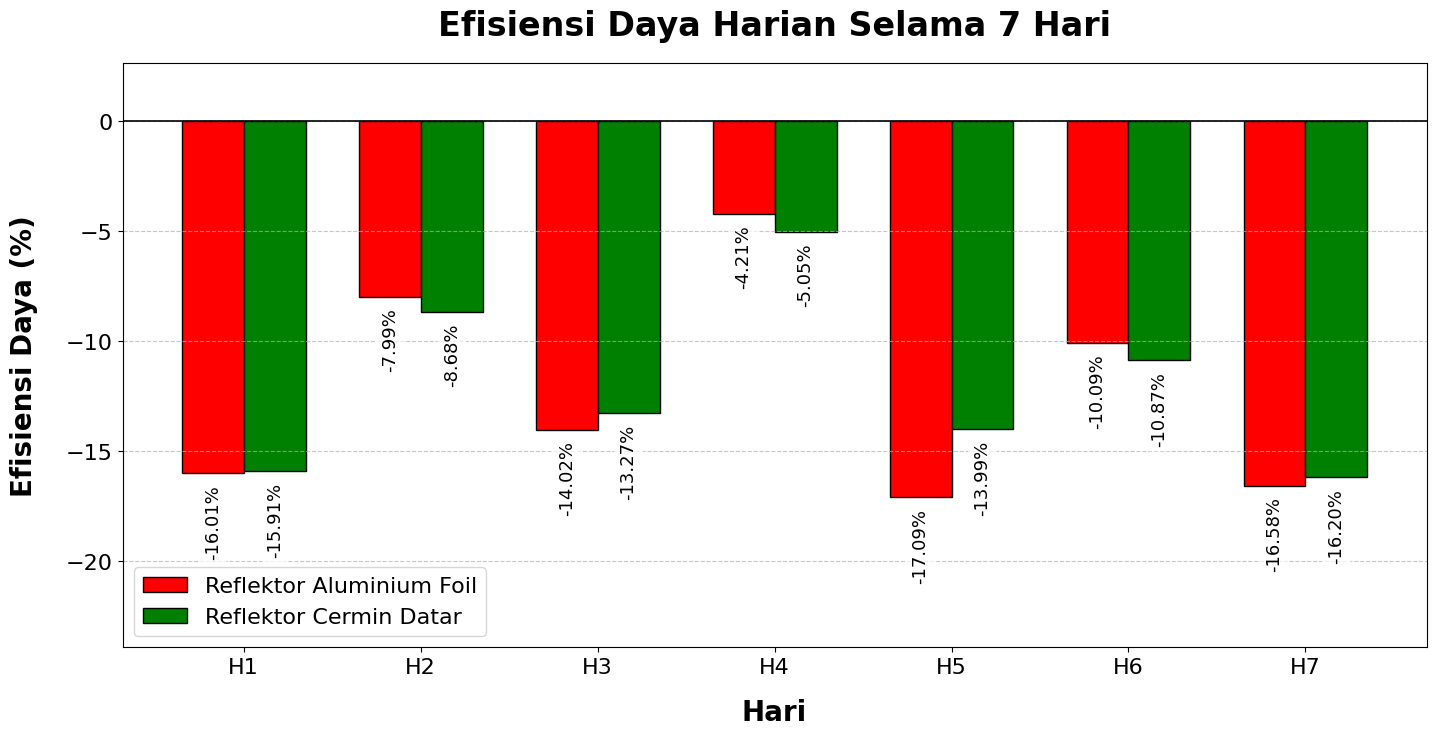

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Data harus sudah dimuat dalam variabel `data`
# Kolom wajib: 'hari_num', 'Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar'

# Hitung rata-rata daya per hari
avg_power_per_day = data.groupby('hari_num')[['Reflektor Aluminium Foil', 'Tanpa Reflektor', 'Reflektor Cermin Datar']].mean().dropna()
avg_power_per_day = avg_power_per_day[avg_power_per_day.index.isin(range(1, 8))]

# Hitung efisiensi
avg_power_per_day['Efisiensi Aluminium (%)'] = (
    (avg_power_per_day['Reflektor Aluminium Foil'] - avg_power_per_day['Tanpa Reflektor']) / avg_power_per_day['Tanpa Reflektor']
) * 100
avg_power_per_day['Efisiensi Cermin (%)'] = (
    (avg_power_per_day['Reflektor Cermin Datar'] - avg_power_per_day['Tanpa Reflektor']) / avg_power_per_day['Tanpa Reflektor']
) * 100

avg_power_per_day = avg_power_per_day.reset_index()

# ===== Fungsi Tambahan Label =====
def add_efficiency_labels(bars, rotation=90, fontsize=13, padding=0.6):
    for bar in bars:
        height = bar.get_height()
        ypos = height + padding if height >= 0 else height - padding
        va = 'bottom' if height >= 0 else 'top'
        plt.text(
            bar.get_x() + bar.get_width()/2,
            ypos,
            f'{height:.2f}%',
            ha='center',
            va=va,
            fontsize=fontsize,
            rotation=rotation,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7)
        )

# ================================
# GRAFIK 1: Efisiensi Harian
# ================================
plt.figure(figsize=(15, 8))

bar_width = 0.35
r1 = np.arange(len(avg_power_per_day))
r2 = [x + bar_width for x in r1]

bars_al = plt.bar(r1, avg_power_per_day['Efisiensi Aluminium (%)'],
                  color='red', width=bar_width,
                  edgecolor='black', label='Reflektor Aluminium Foil')
bars_cer = plt.bar(r2, avg_power_per_day['Efisiensi Cermin (%)'],
                   color='green', width=bar_width,
                   edgecolor='black', label='Reflektor Cermin Datar')

add_efficiency_labels(bars_al, padding=0.5)
add_efficiency_labels(bars_cer, padding=0.5)

plt.xlabel('Hari', fontsize=20, labelpad=15, fontweight='bold')
plt.ylabel('Efisiensi Daya (%)', fontsize=20, labelpad=20, fontweight='bold')
plt.title('Efisiensi Daya Harian Selama 7 Hari', fontsize=24, pad=20, fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(avg_power_per_day))],
           [f'H{int(h)}' for h in avg_power_per_day['hari_num']], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=16)
plt.axhline(0, color='black', linewidth=1.2)  # Garis horizontal nol

# ==== Penyesuaian Y-Limit Simetris ====
min_val = min(avg_power_per_day[['Efisiensi Aluminium (%)', 'Efisiensi Cermin (%)']].min())
max_val = max(avg_power_per_day[['Efisiensi Aluminium (%)', 'Efisiensi Cermin (%)']].max())

# Tambahkan padding proporsional
padding = max(abs(min_val), abs(max_val)) * 0.40
plt.ylim(min_val - padding, max_val + padding)

plt.tight_layout(pad=3)
plt.show()


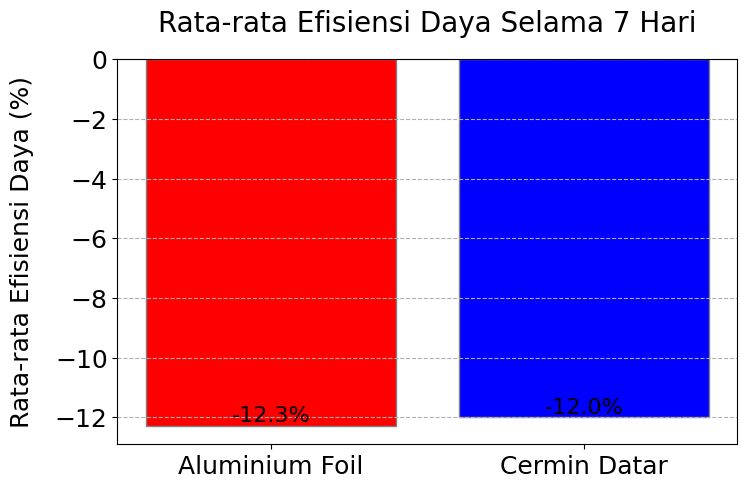

In [ ]:

# ==========================
# Grafik Batang Rata-rata Efisiensi Daya Selama 7 Hari
# ==========================

# Hitung rata-rata efisiensi selama 7 hari
avg_efficiency_overall_al = avg_power_per_day['Efisiensi Aluminium (%)'].mean()
avg_efficiency_overall_cer = avg_power_per_day['Efisiensi Cermin (%)'].mean()

# Buat dataframe untuk data rata-rata keseluruhan
overall_avg_efficiency = pd.DataFrame({
    'Jenis Reflektor': ['Aluminium Foil', 'Cermin Datar'],
    'Rata-rata Efisiensi (%)': [avg_efficiency_overall_al, avg_efficiency_overall_cer]
})

plt.figure(figsize=(8, 5))

# Buat batang untuk rata-rata keseluruhan
bars_overall = plt.bar(overall_avg_efficiency['Jenis Reflektor'], overall_avg_efficiency['Rata-rata Efisiensi (%)'], color=['red', 'blue'], edgecolor='grey')

# Tambahkan label nilai di atas batang
def add_overall_efficiency_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=16)

add_overall_efficiency_labels(bars_overall)

# Tambahkan label sumbu
plt.ylabel('Rata-rata Efisiensi Daya (%)', fontsize=18, labelpad=15)
plt.title('Rata-rata Efisiensi Daya Selama 7 Hari', fontsize=20, pad=20)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y', linestyle='--')
#plt.ylim(bottom=0) # Pastikan sumbu y mulai dari 0
#plt.tight_layout()
plt.show()

